# 1. Understanding Business Needs


**Boston House Prices**

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

  - CRIM     per capita crime rate by town
  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
  - INDUS    proportion of non-retail business acres per town
  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - NOX      nitric oxides concentration (parts per 10 million)
  - RM       average number of rooms per dwelling
  - AGE      proportion of owner-occupied units built prior to 1940
  - DIS      weighted distances to five Boston employment centres
  - RAD      index of accessibility to radial highways
  - TAX      full-value property-tax rate per 10 000 USD
  - PTRATIO  pupil-teacher ratio by town
  - B        1000 (Bk - 0.63)^2 where Bk is the proportion of black people by town
  - LSTAT    % lower status of the population
  - MEDV     Median value of owner-occupied homes in $1000's

Missing Attribute Values: None

# 2. Data collection

In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [376]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_boston = pd.read_csv('datasets/housing.csv', header = None, delimiter = r"\s+", names = column_names)

In [377]:
raw_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [378]:
X = raw_boston [['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = raw_boston[ 'MEDV']

# 3. Data preprocessing
* *Data cleaning* - Datatype issues, data duplicacy, data inconsistency, handling missing values, noisy data
* *split numerical & categorical cols*
* *Encoding categorical data* - one-hot encoding, label encoding

In [379]:
raw_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

no missing values.

In [380]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


no datatpe issues

# 4. EDA

**4.1 Univariate analysis**

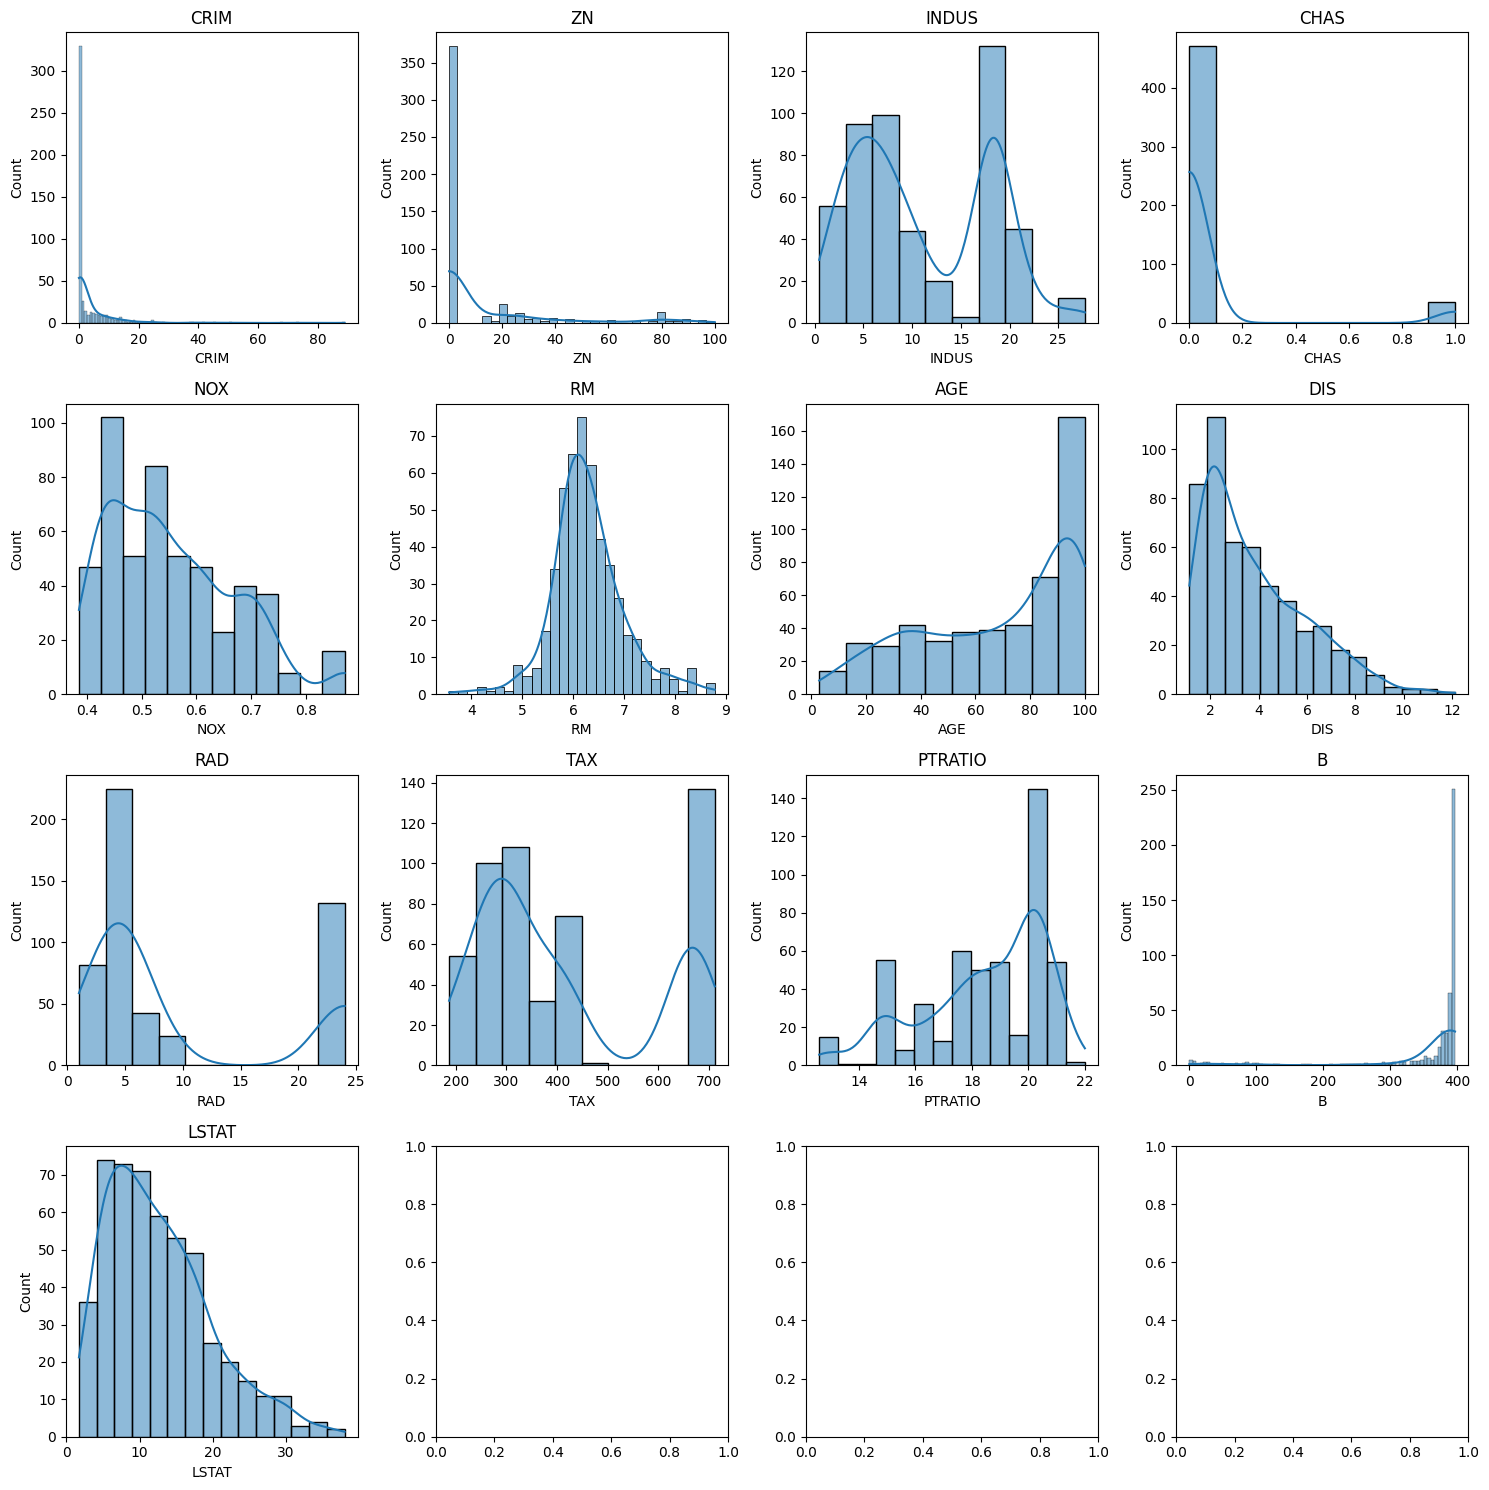

In [381]:
num_cols = len(X)
num_rows = 4  
num_cols_per_row = 4  

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(column_names[:-1]):
    if i < num_cols:
        ax = axes[i]
        sns.histplot(data=raw_boston[column], kde=True, ax=ax)
        ax.set_title(column)

plt.tight_layout()
plt.show()

Note the data distributions above. we will again compare it after handling missing values and outliers. The data distribution should be same.

**4.2 correlation matrix**

Text(0.5, 1.0, 'Boston Correlation Heatmap')

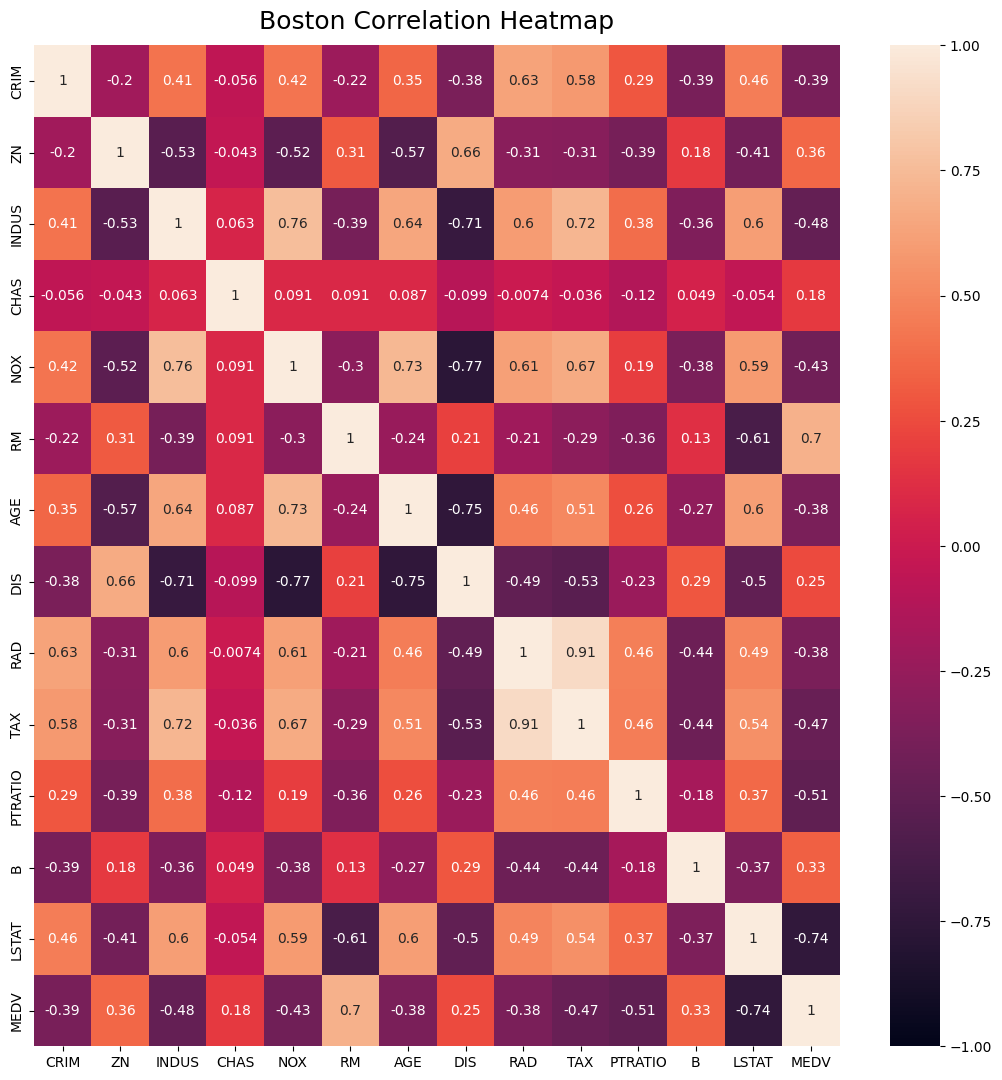

In [382]:
plt.figure(figsize = (13, 13))
heatmap = sns.heatmap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Boston Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

**4.3 clustermap**

<Figure size 400x400 with 0 Axes>

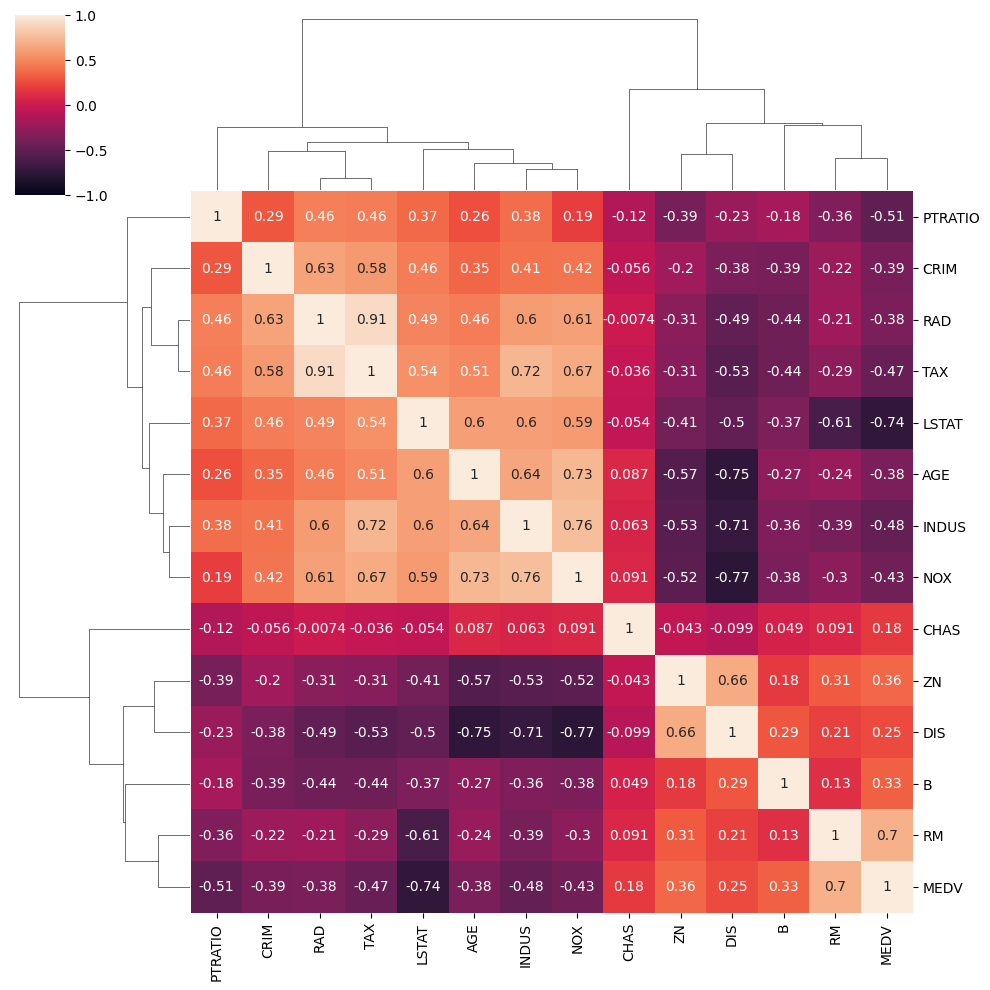

In [383]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)

**4.4 outlier analysis**

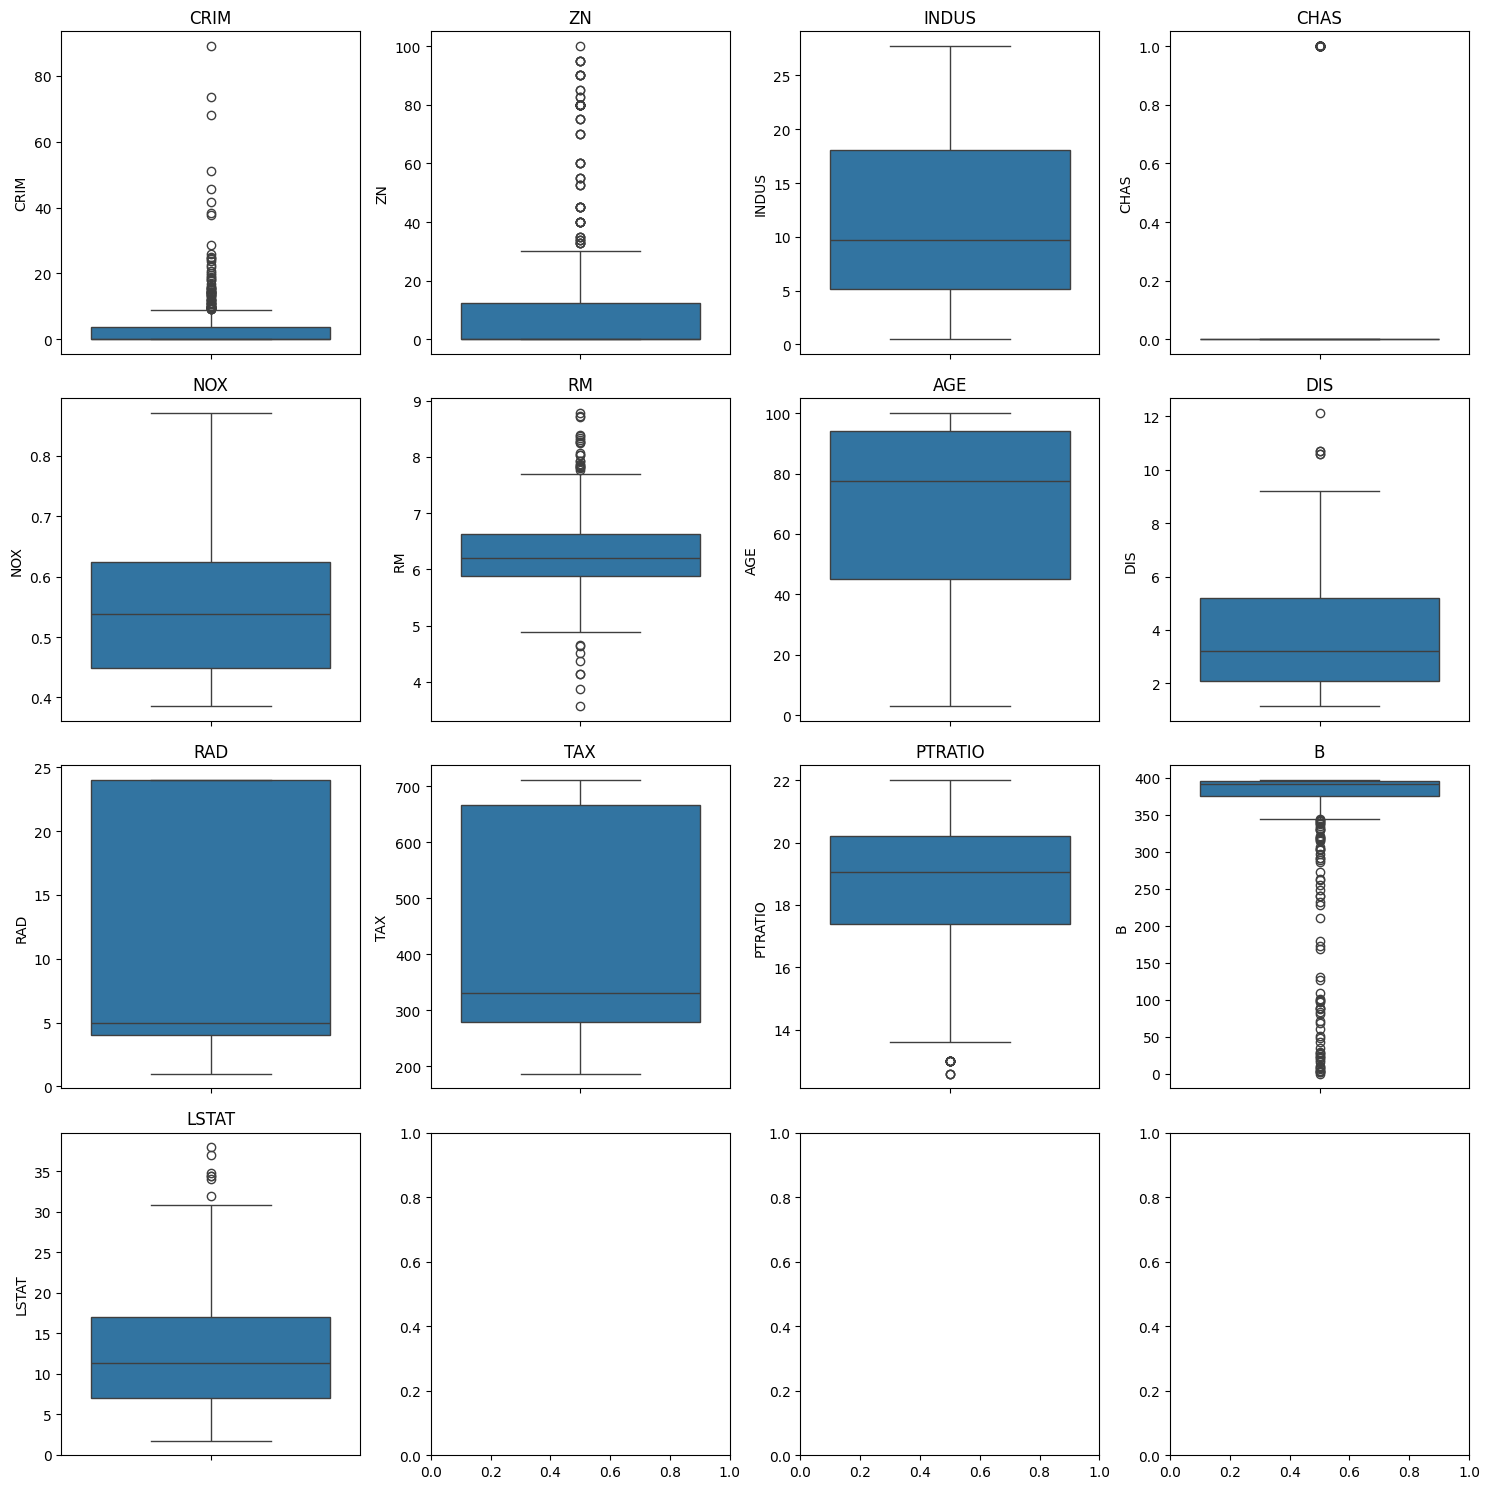

In [384]:
num_cols = len(column_names[:-1])
num_rows = 4
num_cols_per_row = 4

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(column_names[:-1]):
    if i < num_cols:
        ax = axes[i]
        sns.boxplot(data=raw_boston[column], ax=ax)
        ax.set_title(column)

plt.tight_layout()
plt.show()


**4.5 Handling outliers - rescale outliers**

In [385]:
column_with_outliers = ['CRIM', 'ZN','RM',  'DIS', 'PTRATIO', 'B', 'LSTAT']

**Winsorization** is a statistical technique used to deal with outliers in a dataset. The Winsorizer replaces extreme values (outliers) in a dataset with less extreme values.

Here's how it works:

**Identify outliers:** The first step is to identify the outliers in the dataset. These are typically values that are significantly higher or lower than the rest of the values in the dataset.

**Define trimming percentages:** With Winsorization, you specify trimming percentages, typically denoted as alpha. These percentages determine the extent to which the outliers will be replaced.

**Replace outliers:** Values that exceed the upper or lower threshold defined by the trimming percentage are replaced with the value at the threshold.

**Rescale Outliers**

left side outliers -> replaced by Q1 - 1.5(IQR)

right side outliers -> replaced by Q3 + 1.5(IQR)

In [386]:
from feature_engine.outliers import Winsorizer

In [387]:
from feature_engine.outliers import Winsorizer

# Assuming column_names contain the list of column names
winsorizer = Winsorizer(
    capping_method='iqr',  # Can be 'iqr' or 'quantiles'
    tail='both',           # Can be 'left', 'right', or 'both'
    fold=1.5,              # Trimming percentage, e.g., 1.5 corresponds to 1.5*IQR
    variables=column_with_outliers # Pass the list of column names here
)


In [388]:
boston_clean = winsorizer.fit_transform(raw_boston)

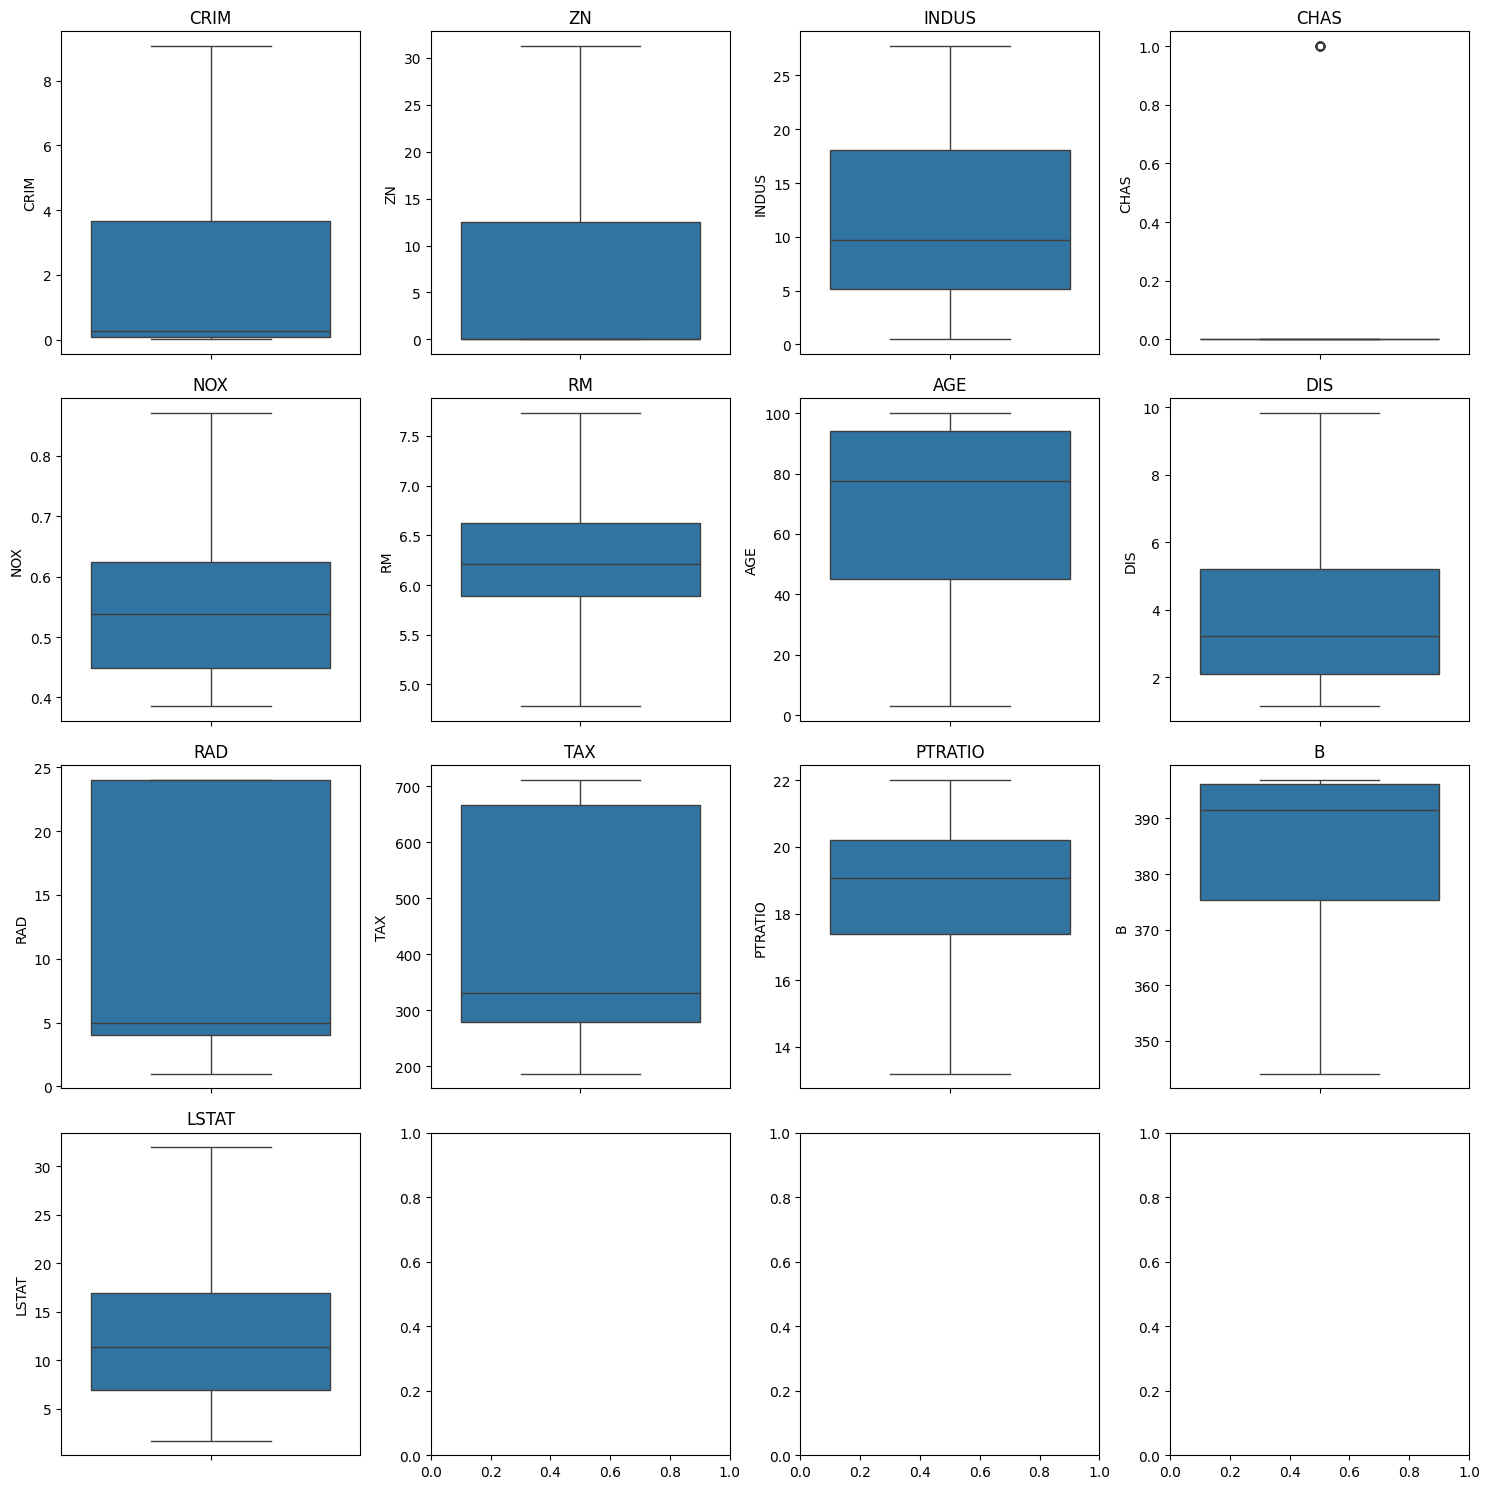

In [389]:
num_cols = len(column_names[:-1])
num_rows = 4
num_cols_per_row = 4

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(column_names[:-1]):
    if i < num_cols:
        ax = axes[i]
        sns.boxplot(data=boston_clean[column], ax=ax)
        ax.set_title(column)

plt.tight_layout()
plt.show()


As we can see, no all extreme values (outliers) have been rescaled.

Now we will check the data distribution again. If the data distribution remains same then its good. Else, we have to treat the outliers in another way.

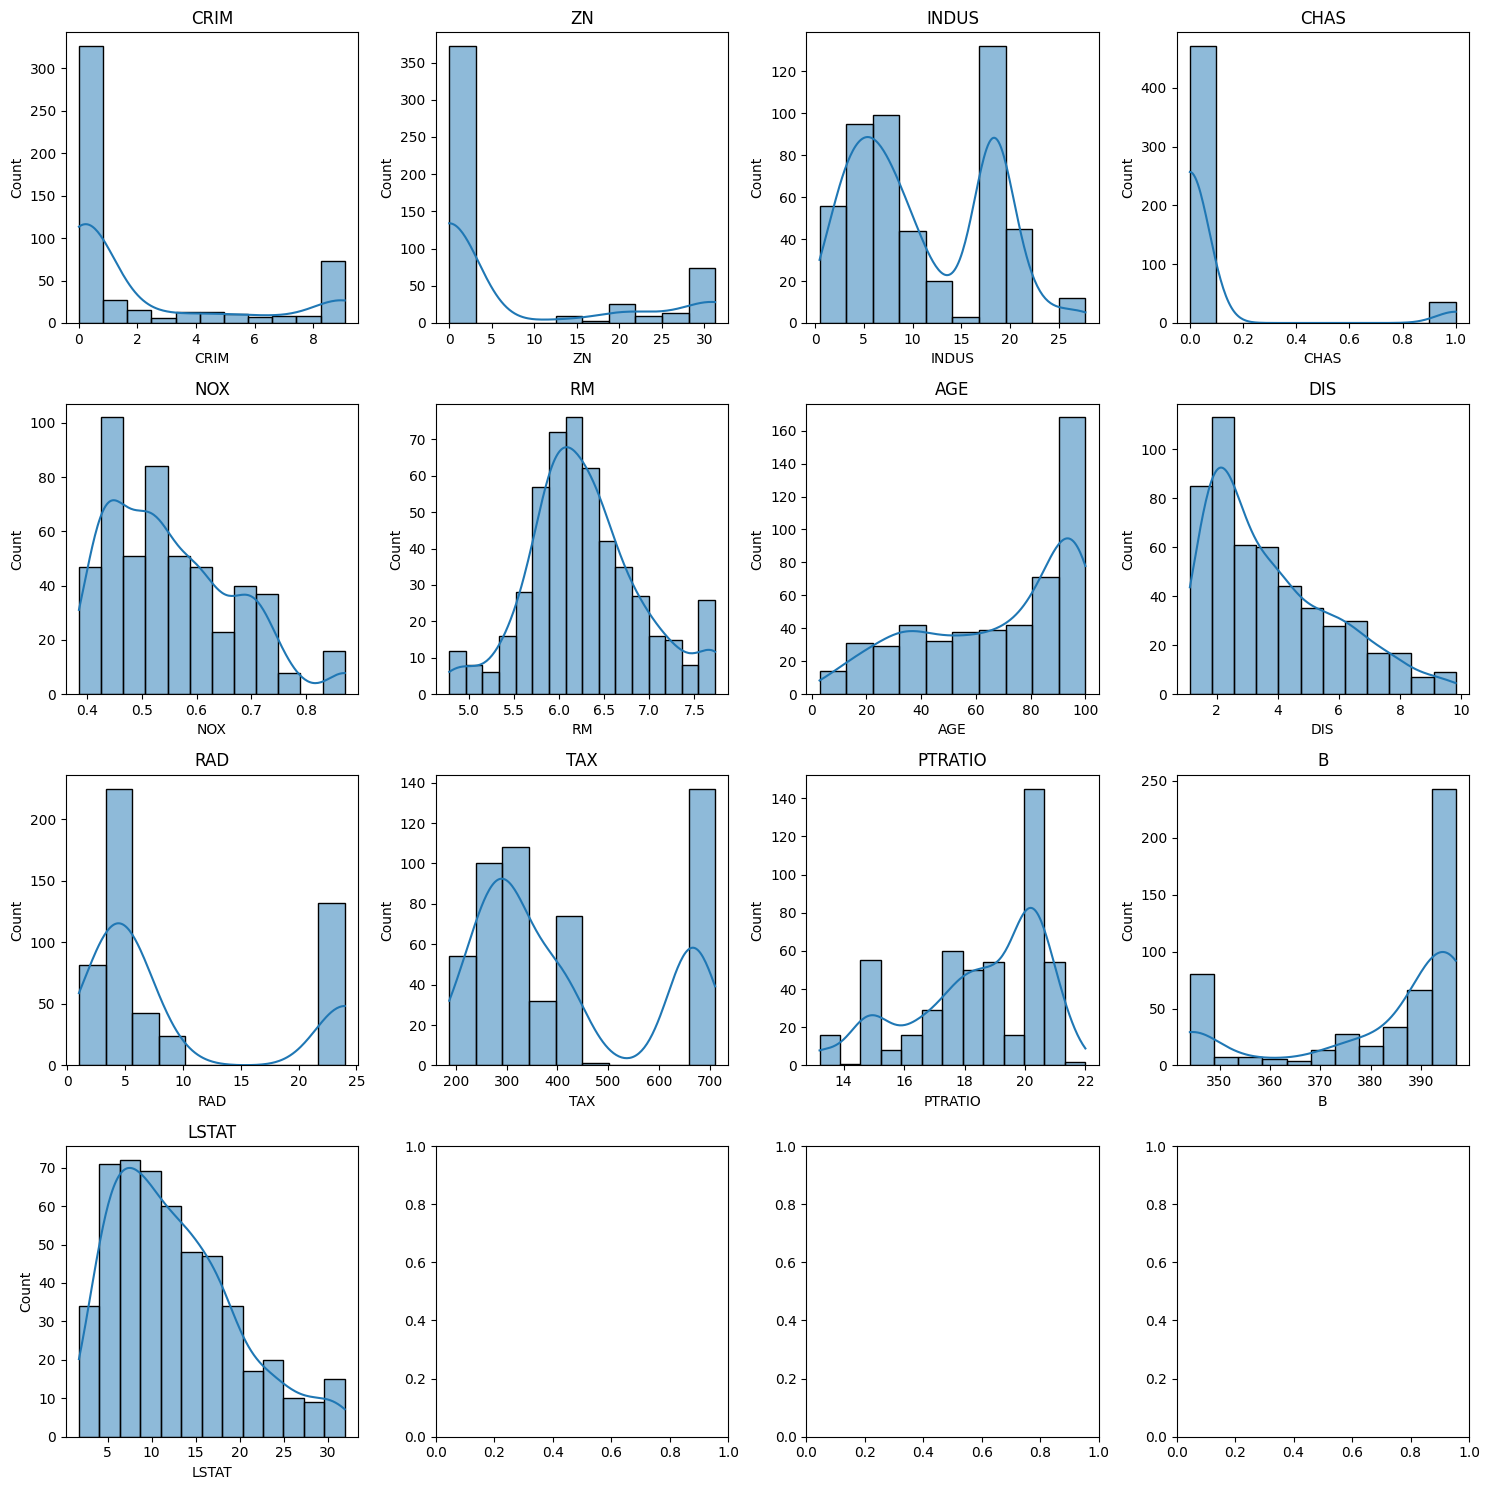

In [390]:
num_cols = len(column_names[:-1])
num_rows = 4  
num_cols_per_row = 4  

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(column_names[:-1]):
    if i < num_cols:
        ax = axes[i]
        sns.histplot(data=boston_clean[column], kde=True, ax=ax)
        ax.set_title(column)

plt.tight_layout()
plt.show()

By comparing the data distribution for all features of boston_clean to raw_boston, the data distribution has remained same post outlier treatment.

**4.6 Train-Test Split**

In [391]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**4.7 Feature scaling - Standardization**

In [392]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 5. Feature Selection

**5.1 Feature reduction based on VIF**

In [393]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 

In [394]:
'''
X_train_df = pd.DataFrame(data=X_train, columns=column_names[:-1])

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_df.columns
vif_data['VIF'] = [VIF(X_train_df.values, i) for i in range(len(X_train_df.columns))]

vif_data
''' 

"\nX_train_df = pd.DataFrame(data=X_train, columns=column_names[:-1])\n\nvif_data = pd.DataFrame()\nvif_data['Feature'] = X_train_df.columns\nvif_data['VIF'] = [VIF(X_train_df.values, i) for i in range(len(X_train_df.columns))]\n\nvif_data\n"

In [395]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [VIF(X.values, i) for i in range(len(X.columns))]

print(vif_data)

    Feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


We have a huge VIF values here! Let's drop some highly correlated features in the next steps. 

Important notice: we should do that step by step, by dropping features one by one and checking results.

In [396]:
#dropping 'PTRATIO'
X2 = X.drop(columns= 'PTRATIO')

vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [VIF(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

   Feature        VIF
0     CRIM   2.099345
1       ZN   2.451624
2    INDUS  14.275283
3     CHAS   1.142167
4      NOX  73.894171
5       RM  60.598846
6      AGE  21.361234
7      DIS  12.221605
8      RAD  15.159162
9      TAX  59.301541
10       B  18.614751
11   LSTAT  10.138324


In [397]:
#dropping 'NOX'
X2 = X2.drop(columns= 'NOX')

vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [VIF(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

   Feature        VIF
0     CRIM   2.097537
1       ZN   2.449661
2    INDUS  13.150904
3     CHAS   1.138277
4       RM  41.406746
5      AGE  19.889623
6      DIS  12.032952
7      RAD  15.155012
8      TAX  57.720347
9        B  18.396072
10   LSTAT   9.207840


In [398]:
#dropping 'TAX'
X2 = X2.drop(columns= 'TAX')

vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [VIF(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

  Feature        VIF
0    CRIM   2.097466
1      ZN   2.375219
2   INDUS   9.290080
3    CHAS   1.118613
4      RM  39.069063
5     AGE  19.780944
6     DIS  11.817803
7     RAD   4.965633
8       B  18.289917
9   LSTAT   9.046248


In [399]:
#dropping 'RM'
X2 = X2.drop(columns= 'RM')

vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [VIF(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

  Feature        VIF
0    CRIM   2.095367
1      ZN   2.334763
2   INDUS   9.016142
3    CHAS   1.116229
4     AGE  14.000758
5     DIS   8.447694
6     RAD   4.771767
7       B  13.537020
8   LSTAT   8.358925


In [400]:
#dropping 'AGE'
X2 = X2.drop(columns= 'AGE')

vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [VIF(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

  Feature        VIF
0    CRIM   2.095211
1      ZN   2.313889
2   INDUS   8.205465
3    CHAS   1.106350
4     DIS   8.209371
5     RAD   4.689836
6       B  10.074224
7   LSTAT   6.856889


In [401]:
#dropping 'B'
X2 = X2.drop(columns= 'B')

vif_data = pd.DataFrame()
vif_data['Feature'] = X2.columns
vif_data['VIF'] = [VIF(X2.values, i) for i in range(len(X2.columns))]

print(vif_data)

  Feature       VIF
0    CRIM  2.067135
1      ZN  2.299351
2   INDUS  6.900077
3    CHAS  1.086574
4     DIS  3.968908
5     RAD  4.678181
6   LSTAT  6.726973


Now we have all features with VIF value < 10. 

dropped columns -> ['PTRATIO','NOX','TAX','RM','AGE','B']

In the next steps we will compare linear regression model with all features against the one after using VIF for dropping features.

# 6. Model Building

**Here I will train different models and at last I will compare the performance of the models.**

**6.1 Linear Regression (with all the predictor vars)**

In [402]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

In [403]:
from sklearn.model_selection import cross_val_score

In [404]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [405]:
# cross validation score
cv_lr = cross_val_score(estimator=lr, X= X_train, y= y_train, cv = 10)
print("Cross Validated R2: ", round( cv_lr.mean(),4))

# train scores
lr_r2_train = lr.score(X_train, y_train)
lr_mape_train = mape(y_train, y_pred_train_lr)

# test scores
lr_r2_test = lr.score(X_test,y_test)
lr_mape_test = mape(y_test, y_pred_test_lr)


# performance df
lr_score_df = pd.DataFrame({
    'Train': [lr_r2_train, lr_mape_train],
    'Test': [lr_r2_test, lr_mape_test]
}, index=['R2', 'MAPE'])
lr_score_df

Cross Validated R2:  0.6875


,Train,Test
R2,0.743500,0.711226
MAPE,0.165661,0.165212


Text(0.5, 1.0, 'Linear Regression with all features')

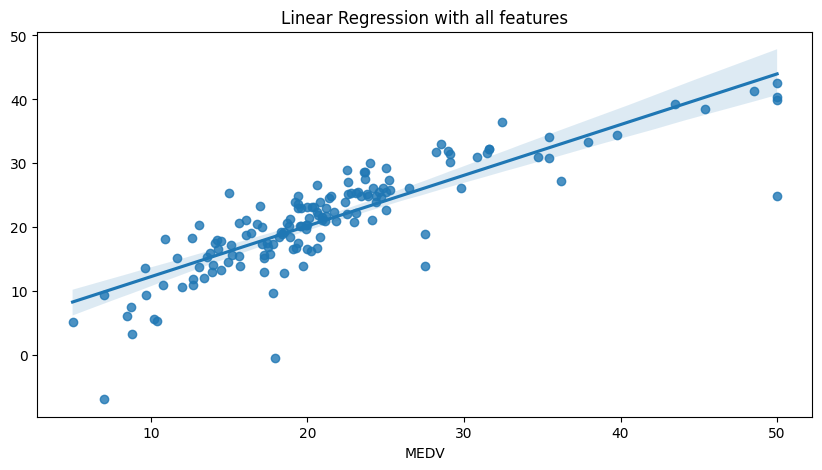

In [406]:
plt.figure(figsize= (10,5))
sns.regplot(x=y_test,y=y_pred_test_lr)
plt.title('Linear Regression with all features')

**6.2 Linear Regression after dropping features using VIF**

In [407]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state= 42)

In [408]:
lr_vif = LinearRegression()

lr_vif.fit(X2_train, y2_train)

y_pred_train_lr_vif = lr_vif.predict(X2_train)
y_pred_test_lr_vif = lr_vif.predict(X2_test)

In [409]:
# cross validation score
cv_lr_vif = cross_val_score(estimator=lr_vif, X= X2_train, y= y2_train, cv = 10)
print("Cross Validated R2: ", round( cv_lr_vif.mean(),4))

# train scores
lr_vif_r2_train = lr_vif.score(X2_train, y2_train)
lr_vif_mape_train = mape(y2_train, y_pred_train_lr_vif)

# test scores
lr_vif_r2_test = lr_vif.score(X2_test,y2_test)
lr_vif_mape_test = mape(y2_test, y_pred_test_lr_vif)


# performance df
lr_score_df = pd.DataFrame({
    'Train': [lr_vif_r2_train, lr_vif_mape_train],
    'Test': [lr_vif_r2_test, lr_vif_mape_test]
}, index=['R2', 'MAPE'])
lr_score_df

Cross Validated R2:  0.606


,Train,Test
R2,0.639411,0.600313
MAPE,0.192200,0.207897


Text(0.5, 1.0, 'Linear Regression after VIF')

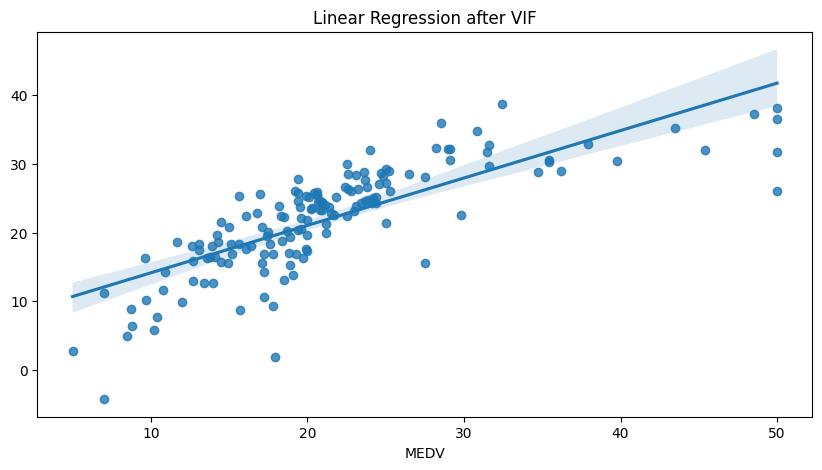

In [410]:
plt.figure(figsize= (10,5))
sns.regplot(x=y2_test,y=y_pred_test_lr_vif)
plt.title('Linear Regression after VIF')

**6.3 Ridge Regression - (L2 Reguarization)**

In [411]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

y_pred_test_ridge = ridge_reg.predict(X_test)
y_pred_train_ridge = ridge_reg.predict(X_train)

In [412]:
# cross validation score
cv_ridge = cross_val_score(estimator=ridge_reg, X= X_train, y= y_train, cv = 10)
print("Cross Validated R2: ", round( cv_ridge.mean(),4))

# train scores
ridge_r2_train = ridge_reg.score(X_train, y_train)
ridge_mape_train = mape(y_train, y_pred_train_ridge)

# test scores
ridge_r2_test = ridge_reg.score(X_test, y_test)
ridge_mape_test = mape(y_test, y_pred_test_ridge)

# performance df
ridge_score_df = pd.DataFrame({
    'Train': [ridge_r2_train, ridge_mape_train],
    'Test': [ridge_r2_test, ridge_mape_test]
}, index=['R2', 'MAPE'])
ridge_score_df

Cross Validated R2:  0.6879


,Train,Test
R2,0.743482,0.710807
MAPE,0.165372,0.165069


Text(0.5, 1.0, 'Ridge Regression')

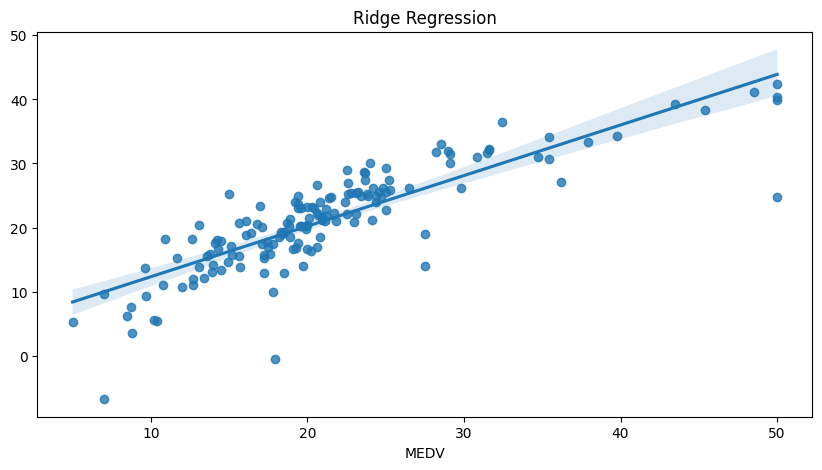

In [413]:
plt.figure(figsize= (10,5))
sns.regplot(x=y_test,y=y_pred_test_ridge)
plt.title('Ridge Regression')

**6.4 Lasso Regression - (L1 Regularization)**

In [414]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X_train,y_train)

y_pred_test_lasso = lasso_reg.predict(X_test)
y_pred_train_lasso = lasso_reg.predict(X_train)

In [415]:
# cross validation score
cv_lasso = cross_val_score(estimator=lasso_reg, X= X_train, y= y_train, cv = 10)
print("Cross Validated R2: ", round( cv_lasso.mean(),4))

# train scores
lasso_r2_train = lasso_reg.score(X_train, y_train)
lasso_mape_train = mape(y_train, y_pred_train_lasso)

# test scores
lasso_r2_test = lasso_reg.score(X_test, y_test)
lasso_mape_test = mape(y_test, y_pred_test_lasso)

# performance df
lasso_score_df = pd.DataFrame({
    'Train': [lasso_r2_train, lasso_mape_train],
    'Test': [lasso_r2_test, lasso_mape_test]
}, index=['R2', 'MAPE'])
lasso_score_df

Cross Validated R2:  0.6777


,Train,Test
R2,0.728536,0.680378
MAPE,0.167495,0.168809


Text(0.5, 1.0, 'Lasso Regression')

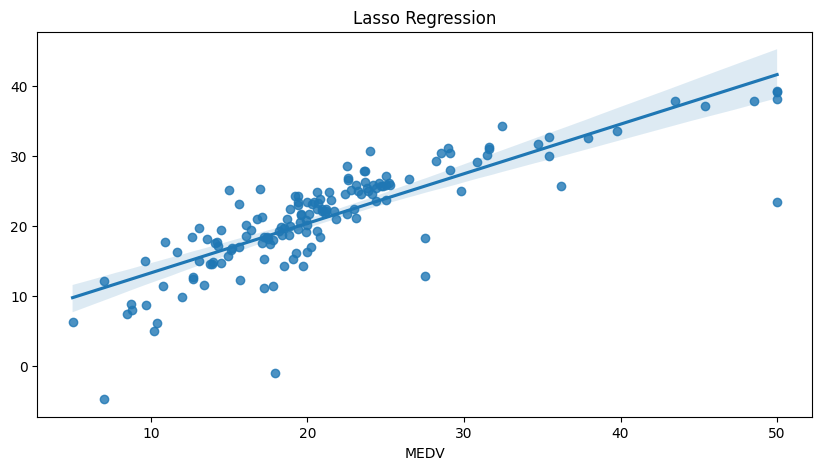

In [416]:
plt.figure(figsize= (10,5))
sns.regplot(x=y_test,y=y_pred_test_lasso)
plt.title('Lasso Regression')

**6.5 Random Forest**

In [417]:
from sklearn.ensemble import RandomForestRegressor

rm = RandomForestRegressor(n_estimators=10, random_state=0)

rm.fit(X_train,y_train)

y_pred_train_rm = rm.predict(X_train)
y_pred_test_rm = rm.predict(X_test)

In [418]:
# cross validation score
cv_rm = cross_val_score(estimator=rm, X= X_train, y= y_train, cv = 10)
print("Cross Validated R2: ", round( cv_rm.mean(),4))

# train scores
rm_r2_train = rm.score(X_train, y_train)
rm_mape_train = mape(y_train, y_pred_train_rm)

# test scores
rm_r2_test = rm.score(X_test,y_test)
rm_mape_test = mape(y_test, y_pred_test_rm)


# performance df
rm_score_df = pd.DataFrame({
    'Train': [rm_r2_train, rm_mape_train],
    'Test': [rm_r2_test, rm_mape_test]
}, index=['R2', 'MAPE'])
rm_score_df

Cross Validated R2:  0.8175


,Train,Test
R2,0.967573,0.851082
MAPE,0.047293,0.115497


Text(0.5, 1.0, 'Random Forest')

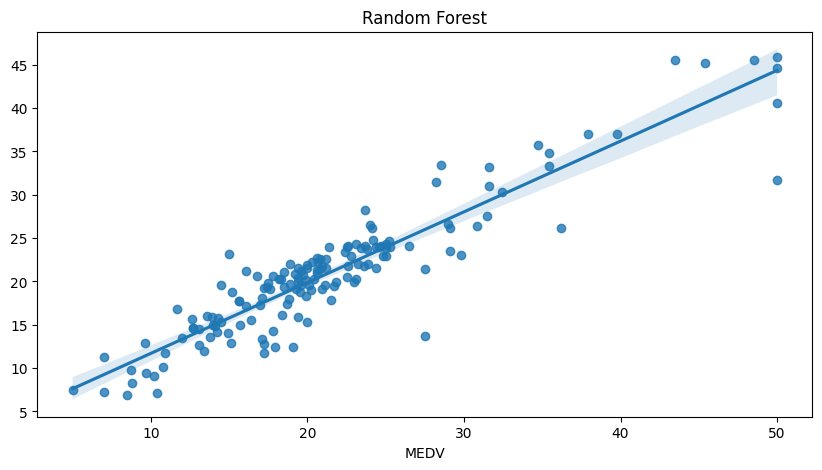

In [419]:
plt.figure(figsize= (10,5))
sns.regplot(x=y_test,y=y_pred_test_rm)
plt.title('Random Forest')

**6.6 Random Forest after VIF**

In [420]:
rm_vif = RandomForestRegressor(n_estimators=10, random_state=0)

rm_vif.fit(X2_train,y2_train)

y_pred_train_rm_vif = rm_vif.predict(X2_train)
y_pred_test_rm_vif = rm_vif.predict(X2_test)

In [421]:
# cross validation score
cv_rm_vif = cross_val_score(estimator=rm_vif, X= X2_train, y= y2_train, cv = 10)
print("Cross Validated R2: ", round( cv_rm_vif.mean(),4))

# train scores
rm_vif_r2_train = rm_vif.score(X2_train, y2_train)
rm_vif_mape_train = mape(y2_train, y_pred_train_rm_vif)

# test scores
rm_vif_r2_test = rm_vif.score(X2_test,y2_test)
rm_vif_mape_test = mape(y2_test, y_pred_test_rm_vif)


# performance df
rm_vif_score_df = pd.DataFrame({
    'Train': [rm_vif_r2_train, rm_vif_mape_train],
    'Test': [rm_vif_r2_test, rm_vif_mape_test]
}, index=['R2', 'MAPE'])
rm_vif_score_df

Cross Validated R2:  0.7553


,Train,Test
R2,0.945599,0.738778
MAPE,0.059029,0.138014


Text(0.5, 1.0, 'Random Forest after VIF')

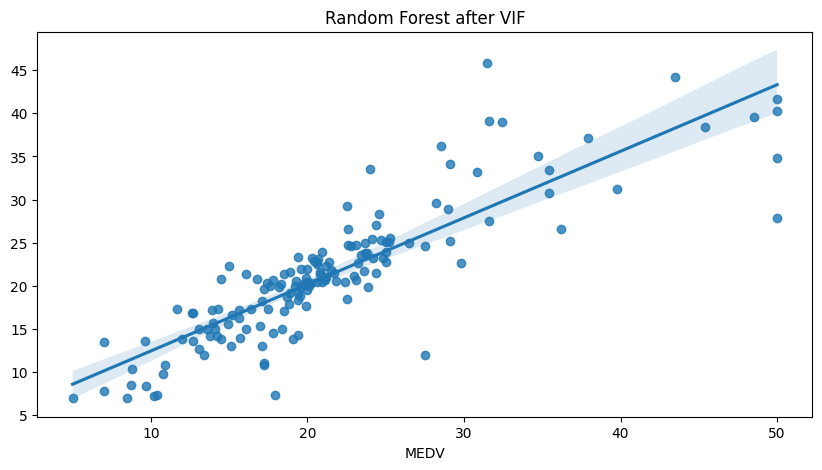

In [422]:
plt.figure(figsize= (10,5))
sns.regplot(x=y2_test,y=y_pred_test_rm_vif)
plt.title('Random Forest after VIF')

# 7. Hyperparameter Tuning (using GridSearchCV)

**7.1 Tuned Ridge Regresion**

# 8. MODEL EVALUATION

In [424]:
models = [('Linear Regression',lr_mape_test,lr_r2_test),
          ('Linear Regression after VIF',lr_vif_mape_test,lr_vif_r2_test ),
          ('Ridge Regression',ridge_mape_test,ridge_r2_test ),
          ('Lasso Regression',lasso_mape_test,lasso_r2_test ),
          ('Random Forest Regressor',rm_mape_test,rm_r2_test ),
          ('Random Forest Regression after VIF',rm_vif_mape_test,rm_vif_r2_test)]

prediction_scores = pd.DataFrame(data = models, columns=['Model', 'MAPE','R2'])
prediction_scores

,Model,MAPE,R2
0,Linear Regression,0.165212,0.711226
1,Linear Regression after VIF,0.207897,0.600313
2,Ridge Regression,0.165069,0.710807
3,Lasso Regression,0.168809,0.680378
4,Random Forest Regressor,0.115497,0.851082
5,Random Forest Regression after VIF,0.138014,0.738778
